In [89]:
 !sudo apt-get install -y fonts-nanum
 !sudo fc-cache -fv
 !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('supermarket.csv')
data['date_time'] = data['Date'] +' ' +data['Time']
data['date_time'] = pd.to_datetime(data['date_time'])
data['Date'] = pd.to_datetime(data['Date'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00


* 물건 1개당 단가의 차이는 별로없지만, 1회 구매시 대부분 300달러 이하로 거래한다

In [4]:
# barpolt 수치 찍기기
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [6]:
data_2 = data.groupby(['Gender','Product line'],as_index=False).agg(gross_income_sum = ('gross income','sum'),count = ('cogs','count'))
data_3 = data.groupby(['Customer type','Product line'],as_index=False).agg(gross_income_sum = ('gross income','sum'),count = ('cogs','count'))
data_4 = data.groupby(['Customer type','Gender'],as_index=False).agg(gross_income_mean = ('gross income','mean'),count = ('cogs','count'))
data_5 = data.groupby(['City','Gender'],as_index=False).agg(gross_income_sum = ('gross income','sum'),count = ('cogs','count'))
data_6 = data.groupby(['City','Customer type'],as_index=False).agg(gross_income_sum = ('gross income','sum'),count = ('cogs','count'))
data_7 = data.groupby(['City','Payment'],as_index=False).agg(count = ('cogs','count'))
data_8 = data.groupby(['Gender','Payment'],as_index=False).agg(count = ('cogs','count'))
data_9 = data.groupby(['Product line','Payment'],as_index=False).agg(count = ('cogs','count'))
data_0 = data.groupby(['Customer type','Payment'],as_index=False).agg(count = ('cogs','count'))

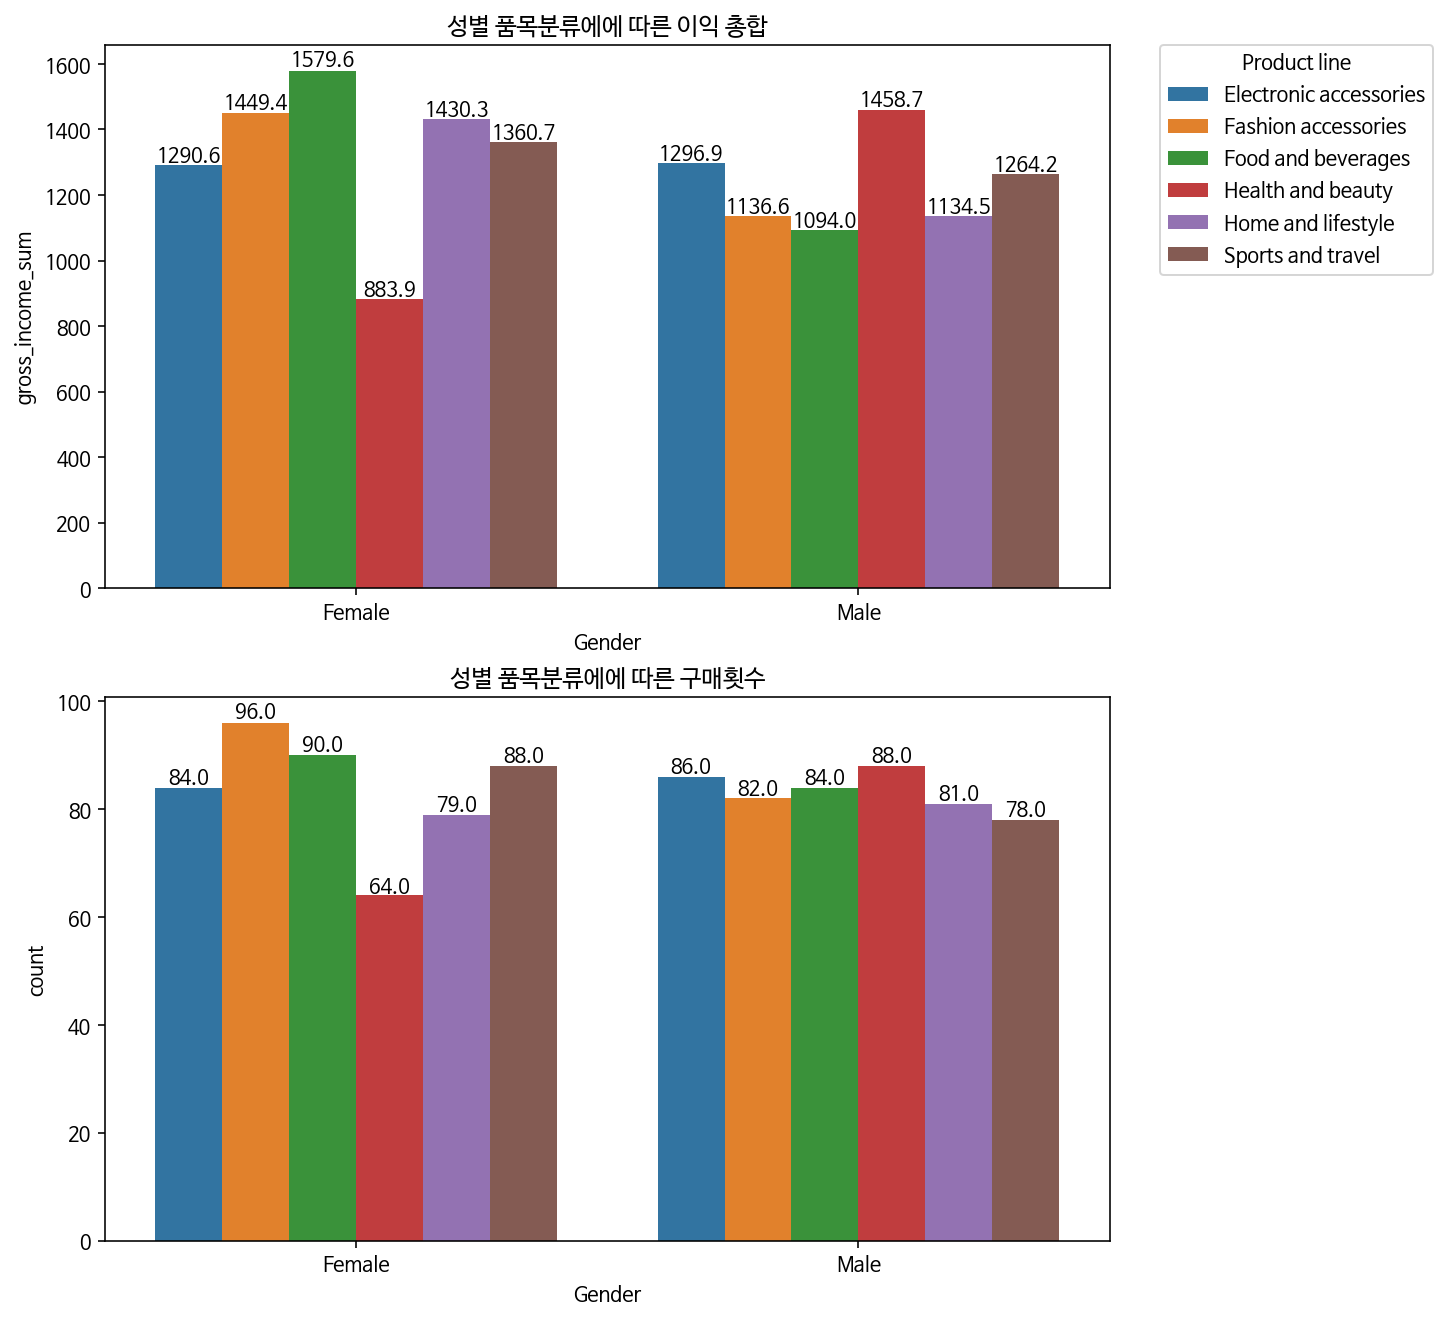

In [16]:
fig_3 = plt.figure(figsize = (9, 11))
ax_8 = fig_3.add_subplot(2,1,1)
g_5 = sns.barplot(data= data_2,x='Gender',y='gross_income_sum',hue='Product line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Product line', borderaxespad=0)
plt.title('성별 품목분류에에 따른 이익 총합')
show_values(g_5)

ax_9 = fig_3.add_subplot(2,1,2)
g_6 = sns.barplot(data= data_2,x='Gender',y='count',hue='Product line')
plt.legend([],[], frameon=False)
plt.title('성별 품목분류에에 따른 구매횟수')
show_values(g_6)

* 남성의 경우 전체적으로 고른 거래 건수를 보여주며 Health and beauty 관련 거래를 가장 많이 했으며 매출이 가장 좋다.
* 여성의 경우 거래 건수에 대한 편차가 심한 편이며, Health and beauty 의 매출이 가장 적다.

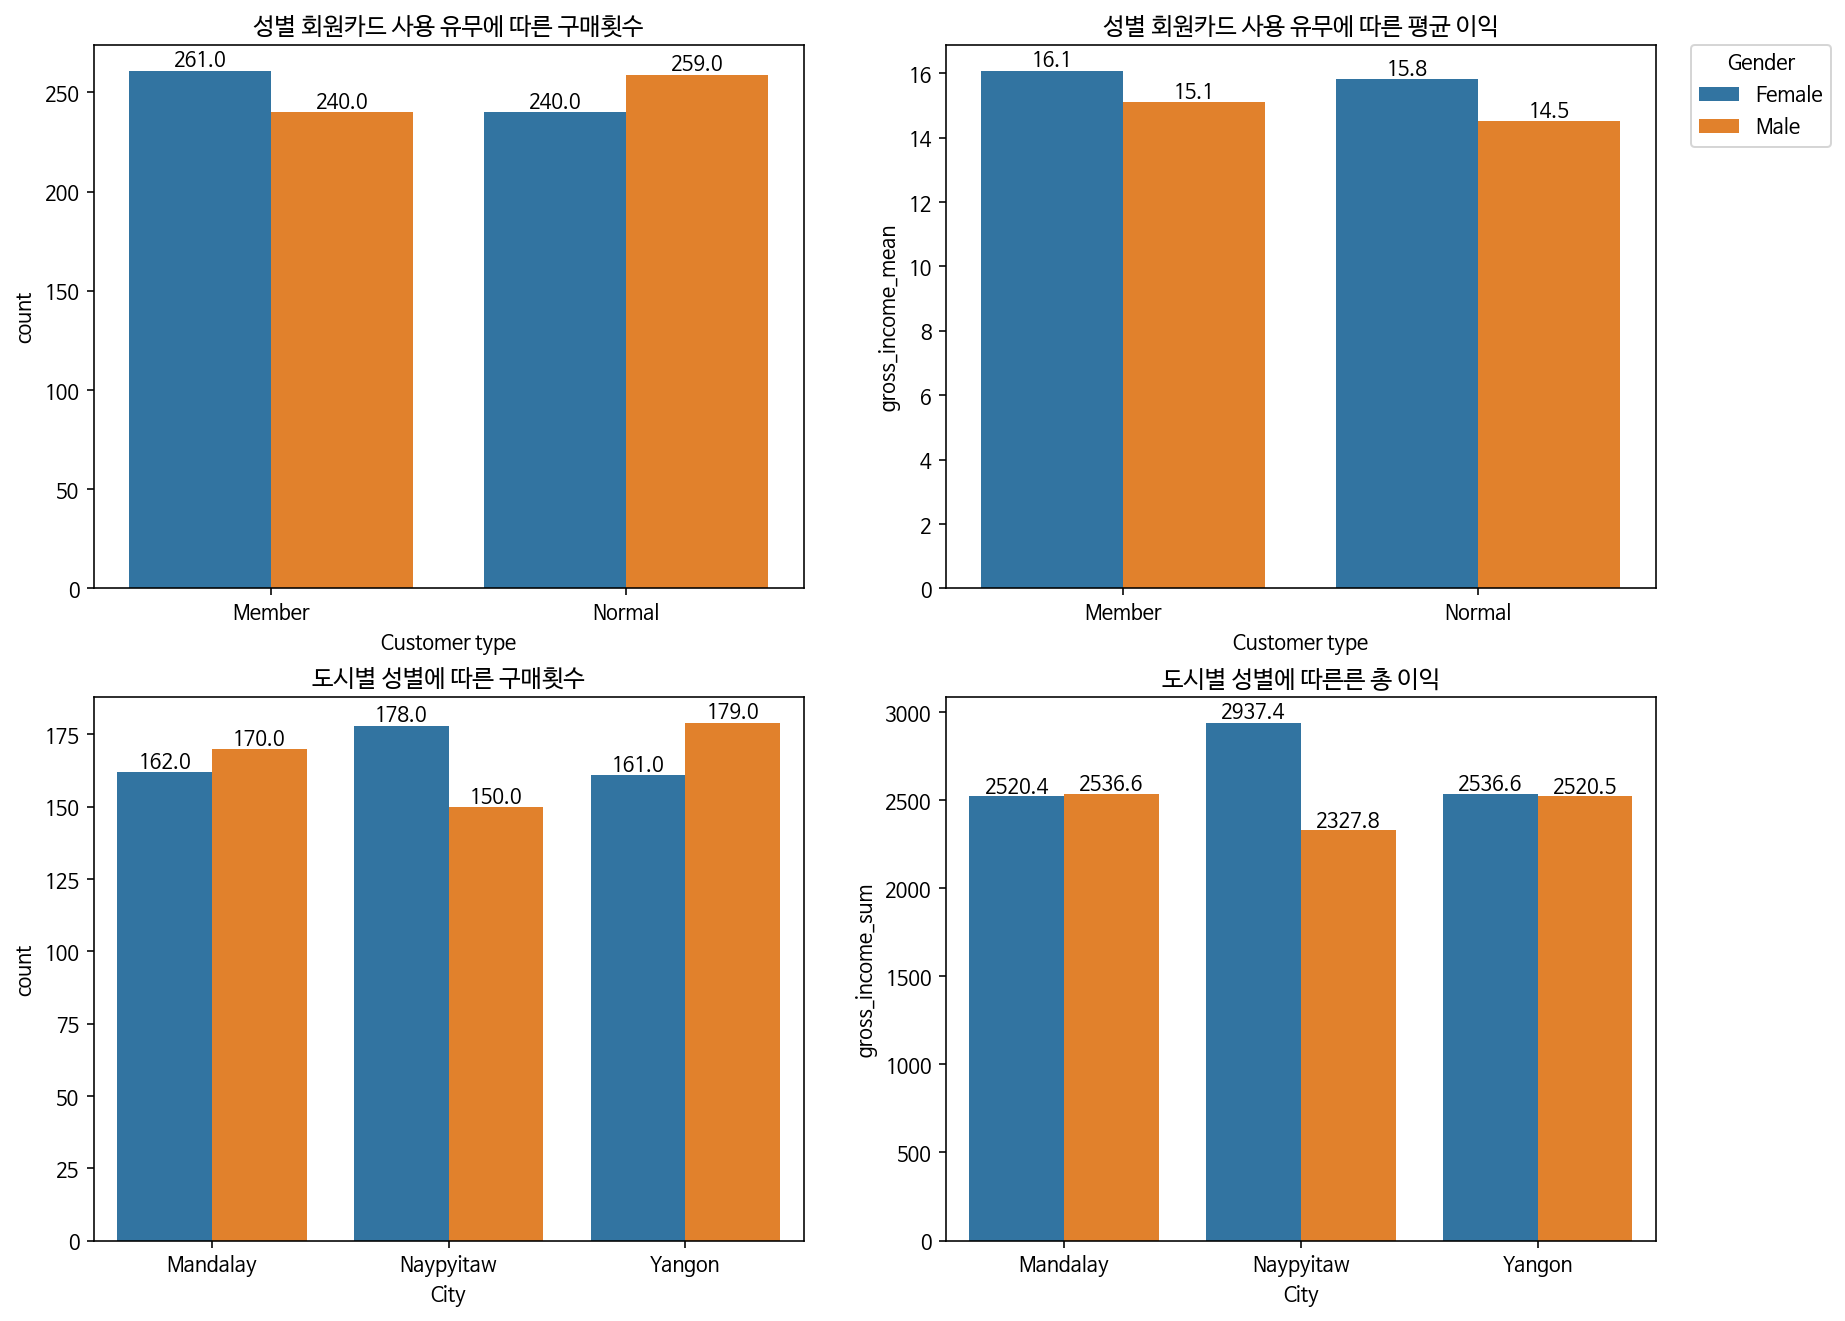

In [15]:
fig = plt.figure(figsize = (14, 11))
ax_1 = fig.add_subplot(2,2,1)
g_14 = sns.barplot(data= data_4,x='Customer type',y='count',hue='Gender')
plt.legend([],[], frameon=False)
plt.title('성별 회원카드 사용 유무에 따른 구매횟수')
show_values(g_14)

ax_2 = fig.add_subplot(2,2,2)
g_4 = sns.barplot(data= data_4,x='Customer type',y='gross_income_mean',errwidth=0,hue='Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Gender', borderaxespad=0)
plt.title('성별 회원카드 사용 유무에 따른 평균 이익')
show_values(g_4)

ax_3 = fig.add_subplot(2,2,4)
g_15 = sns.barplot(data= data_5,x='City',y='gross_income_sum',hue='Gender')
plt.legend([],[], frameon=False)
plt.title('성별 도시에 따른른 총 이익')
show_values(g_15)

ax_4 = fig.add_subplot(2,2,3)
g_16 = sns.barplot(data= data_5,x='City',y='count',hue='Gender')
plt.legend([],[], frameon=False)
plt.title('성별 도시에 따른 구매횟수')
show_values(g_16)

* 여자의 경우 회원카드를 사용하는경우가 남성에 비하여 더많으며, 매출 평균이 남성에 비해 더 많다.
* 여성이 Naypyitaw에서는 여성회원의 거래량이 많고 매출이 가장높다.
* 나머지 도시에서는 남성의 거래량이 많다.

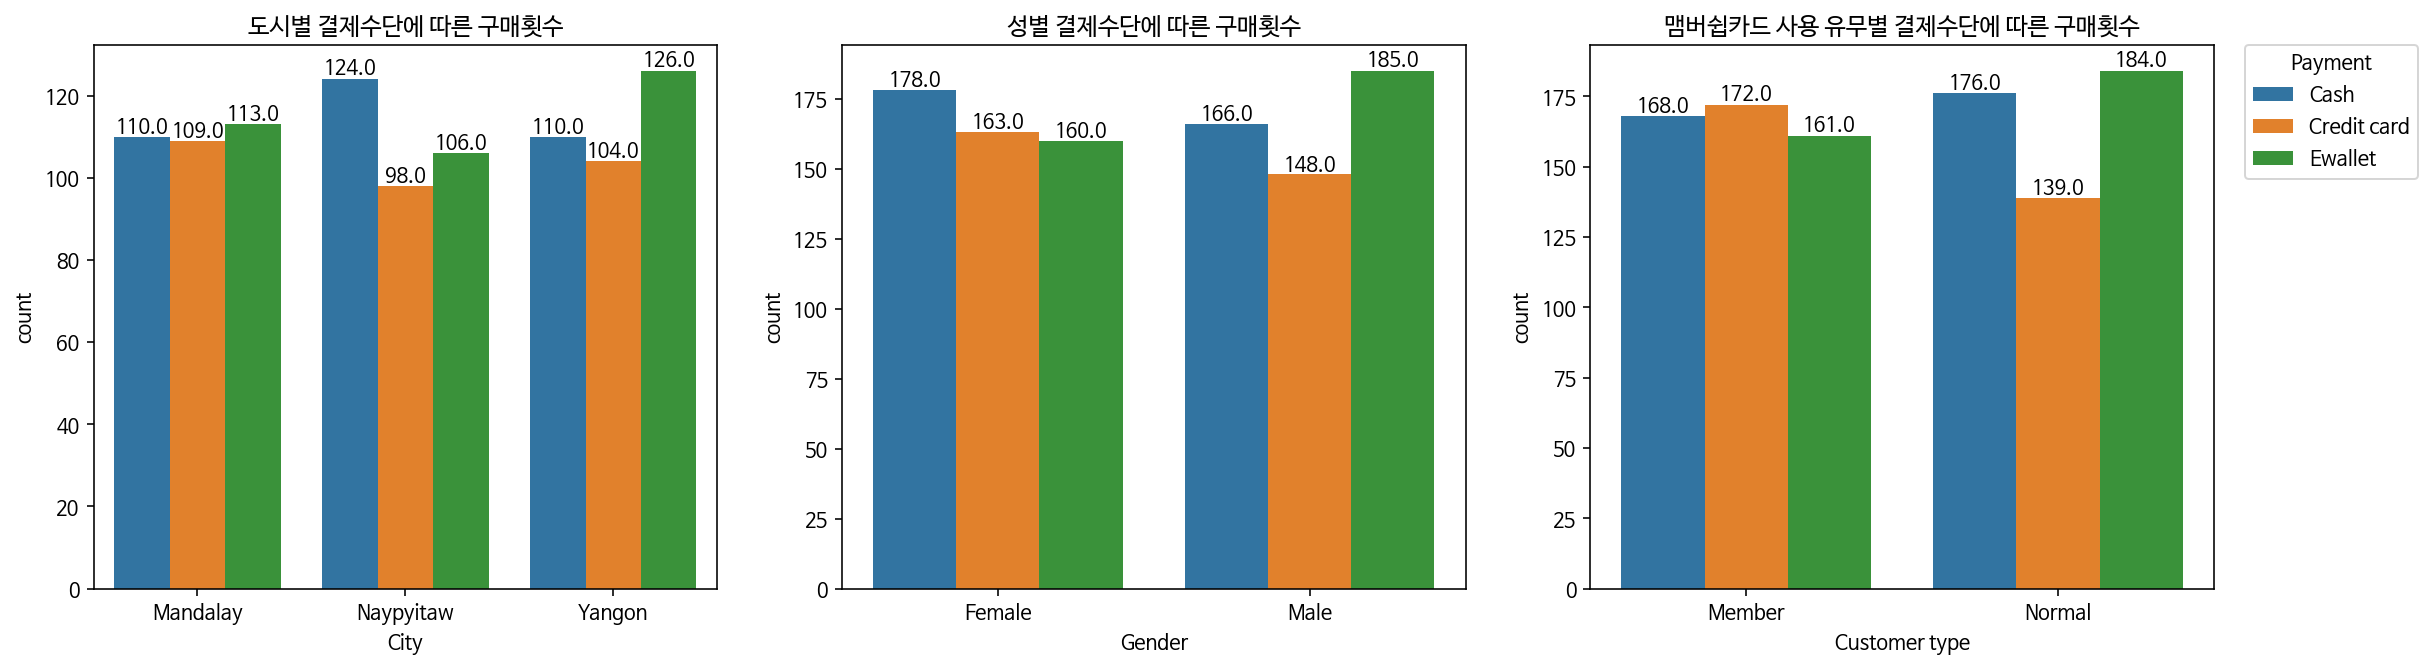

In [14]:
fig_2 = plt.figure(figsize = (19, 5))
ax_5= fig_2.add_subplot(1,3,1)
g_24 = sns.barplot(data= data_7,x='City',y='count',hue='Payment')
plt.legend([],[], frameon=False)
plt.title('도시별 결제수단에 따른 구매횟수')
show_values(g_24)

ax_6 = fig_2.add_subplot(1,3,2)
g_28 = sns.barplot(data= data_8,x='Gender',y='count',hue='Payment')
plt.title('성별 결제수단에 따른 구매횟수')
plt.legend([],[], frameon=False)
show_values(g_28)

ax_7 = fig_2.add_subplot(1,3,3)
g_36 = sns.barplot(data= data_0,x='Customer type',y='count',hue='Payment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Payment', borderaxespad=0)
plt.title('회원카드 사용 유무별 결제수단에 따른 구매횟수')
show_values(g_36)

* Naypyitaw 의 결제 비율은 현금이 가장 많고, Yangon 의 결제 비율은 전자지갑이 가장 많다.
* 여자의 경우 현금의 결제 횟수가 많고 남자의 경우 전자지갑의 결제 횟수가 많다.
* 회원카드를 사용하지 않는 고객의 결제 수단은 전자지갑이이 가장많고 신용카드사용비율이 가장 적다.
* 회원카드를 사용하는 고객의 결제 수단은 신용카드가 가장 많다.

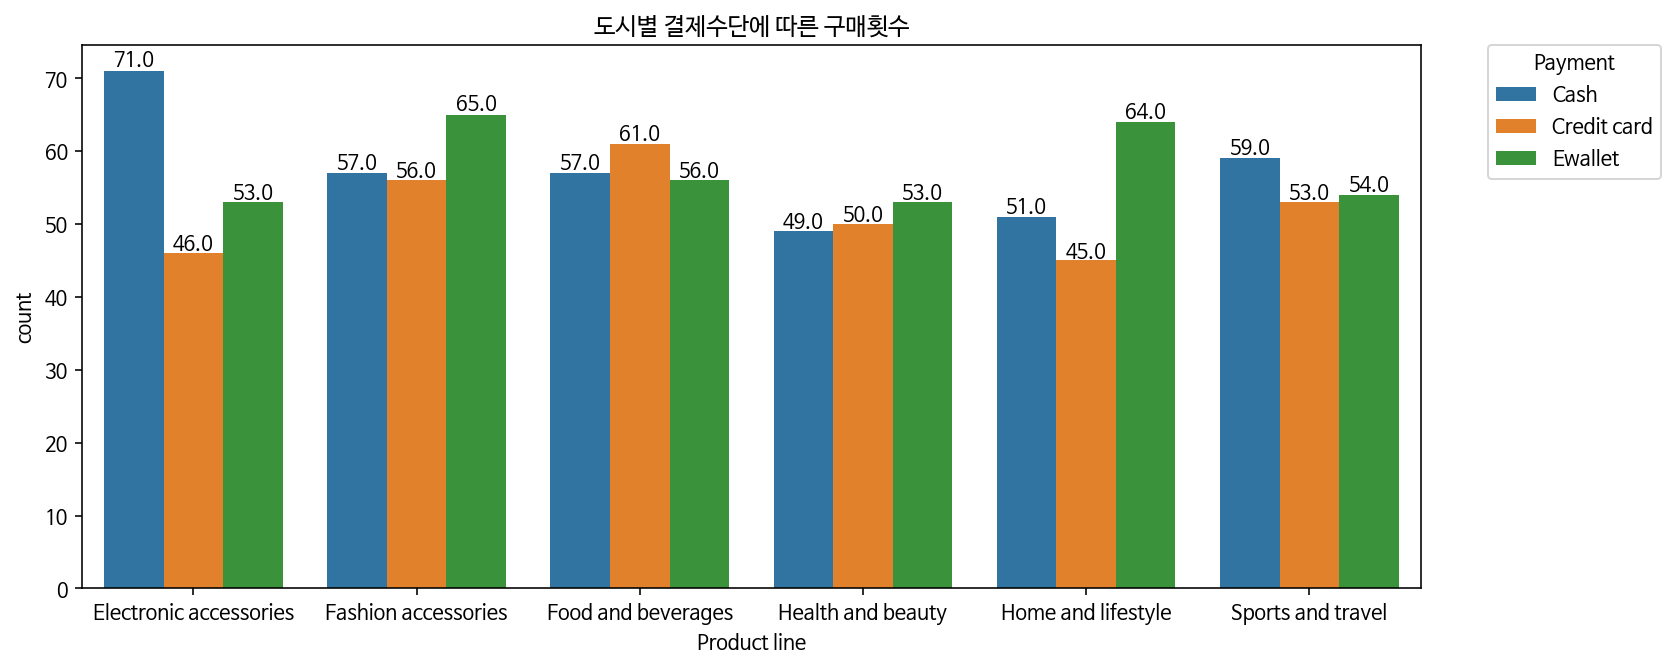

In [17]:
plt.figure(figsize = (12, 5))
g_32 = sns.barplot(data= data_9,x='Product line',y='count',hue='Payment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title= 'Payment', borderaxespad=0)
plt.title('도시별 결제수단에 따른 구매횟수')
show_values(g_32)

* Electronic accessories 의 결제 수단은 현금이 가장 많다
* Fashion accessories 와 Home and lifestyle의 결제 수단은 전자지갑이 가장많다.